In [3]:
import h5py
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import numpy as np
import datetime
import pandas as pd
##from dasquakes import *
import obspy
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
#from libcomcat.search import search
#from libcomcat.dataframes import get_summary_data_frame
#import geopy.distance
from obspy.taup import TauPyModel
from obspy import UTCDateTime
from obspy import read
from obspy import imaging
import matplotlib.pyplot as plt
from obspy import read

In [4]:
#Date

time = UTCDateTime()
print(time + 3600)
time2 = UTCDateTime("1994-03-23T12:15:33")
print(((((time - time2)/60)/60)/24)/365)


2022-10-20T02:03:26.655142Z
28.595981533965688


In [7]:
#Read

st = read('C:/Users/jepul/OneDrive/Escritorio/Seismology/SR_DATA/sandra_ridge - Copy/LAB/2015-01-24-1800-00.XX_00000__003')


In [8]:
#Info Data
#print(st)
len(st)
tr = st[0]
print(tr)
print(tr.stats)
tr.stats.station
##tr.stats.gse2.datatype

XX.00000..003 | 2015-01-24T18:00:00.000000Z - 2015-01-24T19:00:06.000000Z | 250.0 Hz, 901501 samples
         network: XX
         station: 00000
        location: 
         channel: 003
       starttime: 2015-01-24T18:00:00.000000Z
         endtime: 2015-01-24T19:00:06.000000Z
   sampling_rate: 250.0
           delta: 0.004
            npts: 901501
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 376, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 4096, 'filesize': 1540096})


'00000'

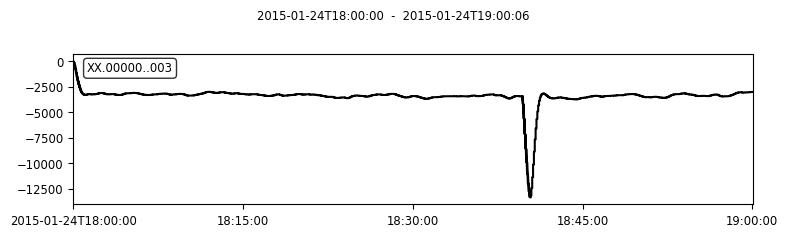

In [9]:
#Processing
ft = st.filter("lowpass", freq=0.01, corners=2)
ft = st.plot(interval=30, right_vertical_labels=False,
        vertical_scaling_range=1, one_tick_per_line=True,
        #color=['k', 'r', 'b', 'g'], show_y_UTC_label=False,
        events={'min_magnitude': 6.5})

In [ ]:
"""
bandpass

bandstop

lowpass

highpass
"""

In [10]:
# There is only one trace in the Stream object, let's work on that trace...
tr = st[0]

In [11]:
# Decimate the 200 Hz data by a factor of 4 to 50 Hz. Note that this
# automatically includes a lowpass filtering with corner frequency 20 Hz.
# We work on a copy of the original data just to demonstrate the effects of
# downsampling.
tr_new = tr.copy()
tr_new.decimate(factor=4, strict_length=False)


XX.00000..003 | 2015-01-24T18:00:00.000000Z - 2015-01-24T19:00:06.000000Z | 62.5 Hz, 225376 samples

In [30]:
# For comparison also only filter the original data (same filter options as in
# automatically applied filtering during downsampling, corner frequency
# 0.4 * new sampling rate)
tr_filt = tr.copy()
tr_filt.filter('lowpass', freq=0.4 * tr.stats.sampling_rate / 4.0)

XX.00000..003 | 2015-01-24T18:00:00.000000Z - 2015-01-24T19:00:06.000000Z | 250.0 Hz, 901501 samples

In [12]:
# Now let's plot the raw and filtered data...
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
t_new = np.arange(0, tr_new.stats.npts / tr_new.stats.sampling_rate, tr_new.stats.delta)

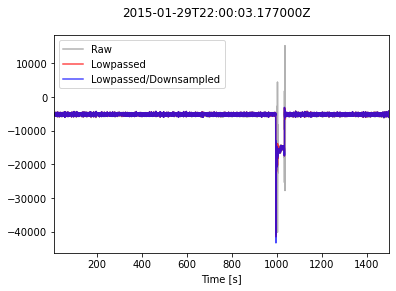

In [16]:
plt.plot(t, tr.data, 'k', label='Raw', alpha=0.3)
plt.plot(t, tr_filt.data, 'r', label='Lowpassed', alpha=0.7)
plt.plot(t_new, tr_new.data, 'b', label='Lowpassed/Downsampled', alpha=0.7)
plt.xlabel('Time [s]')
plt.xlim(10, 1500)
plt.suptitle(tr.stats.starttime)
plt.legend()
plt.show()

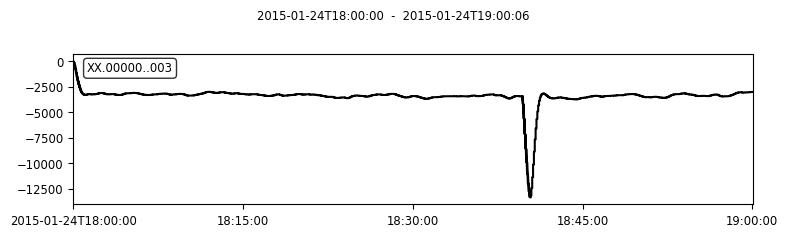

In [13]:
#Figures Obspy
st.plot()
#ts.plot(size=(800, 600))

In [52]:
st = read('C:/Users/jepul/OneDrive/Escritorio/Seismology/SR_DATA/sandra_ridge - Copy/LAB/2015-01-24-1800-00.XX_00000__003')
tr = st[0]


In [53]:
type(tr)
print(tr)
print(st)


XX.00000..003 | 2015-01-24T18:00:00.000000Z - 2015-01-24T19:00:06.000000Z | 250.0 Hz, 901501 samples
1 Trace(s) in Stream:
XX.00000..003 | 2015-01-24T18:00:00.000000Z - 2015-01-24T19:00:06.000000Z | 250.0 Hz, 901501 samples


In [27]:
min(tr)

-148322

In [57]:
pd = pd.DataFrame(tr)


AttributeError: 'DataFrame' object has no attribute 'DataFrame'

In [35]:
type(pd)

pandas.core.frame.DataFrame

In [34]:
pd.keys()

RangeIndex(start=0, stop=1, step=1)

In [38]:
print(pd)

                                                   0
0  (-2914, -4543, -5458, -5576, -5218, -5672, -53...


In [41]:
pd.describe()
# answer it here


,0
count,1
unique,1
top,"(-2914, -4543, -5458, -5576, -5218, -5672, -53..."
freq,1


In [48]:
pd[0]

0    (-2914, -4543, -5458, -5576, -5218, -5672, -53...
Name: 0, dtype: object

In [46]:
max(pd[0])

XX.00000..003 | 2015-01-24T18:00:00.000000Z - 2015-01-24T19:00:06.000000Z | 250.0 Hz, 901501 samples

In [47]:
min(pd[0])

XX.00000..003 | 2015-01-24T18:00:00.000000Z - 2015-01-24T19:00:06.000000Z | 250.0 Hz, 901501 samples